In [1]:
import os
import pandas as pd

# Define path
folder_path = '/kaggle/input/ctc-witec'

# List all files
file_list = os.listdir(folder_path)

# Filter only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Create empty list to store DataFrames
dfs = []

# Import & concatenate CSV into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read CSV into a DataFrame
    df = pd.read_csv(file_path)
    # Append DataFrame to list
    dfs.append(df)
    # Insert empty row after each DataFrame to separate spectra
    dfs.append(pd.DataFrame(columns=df.columns))  # add empty DataFrame as separator

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save DataFrame to CSV
combined_df.to_csv('/kaggle/working/combined_data_with_separator.csv', index=False)

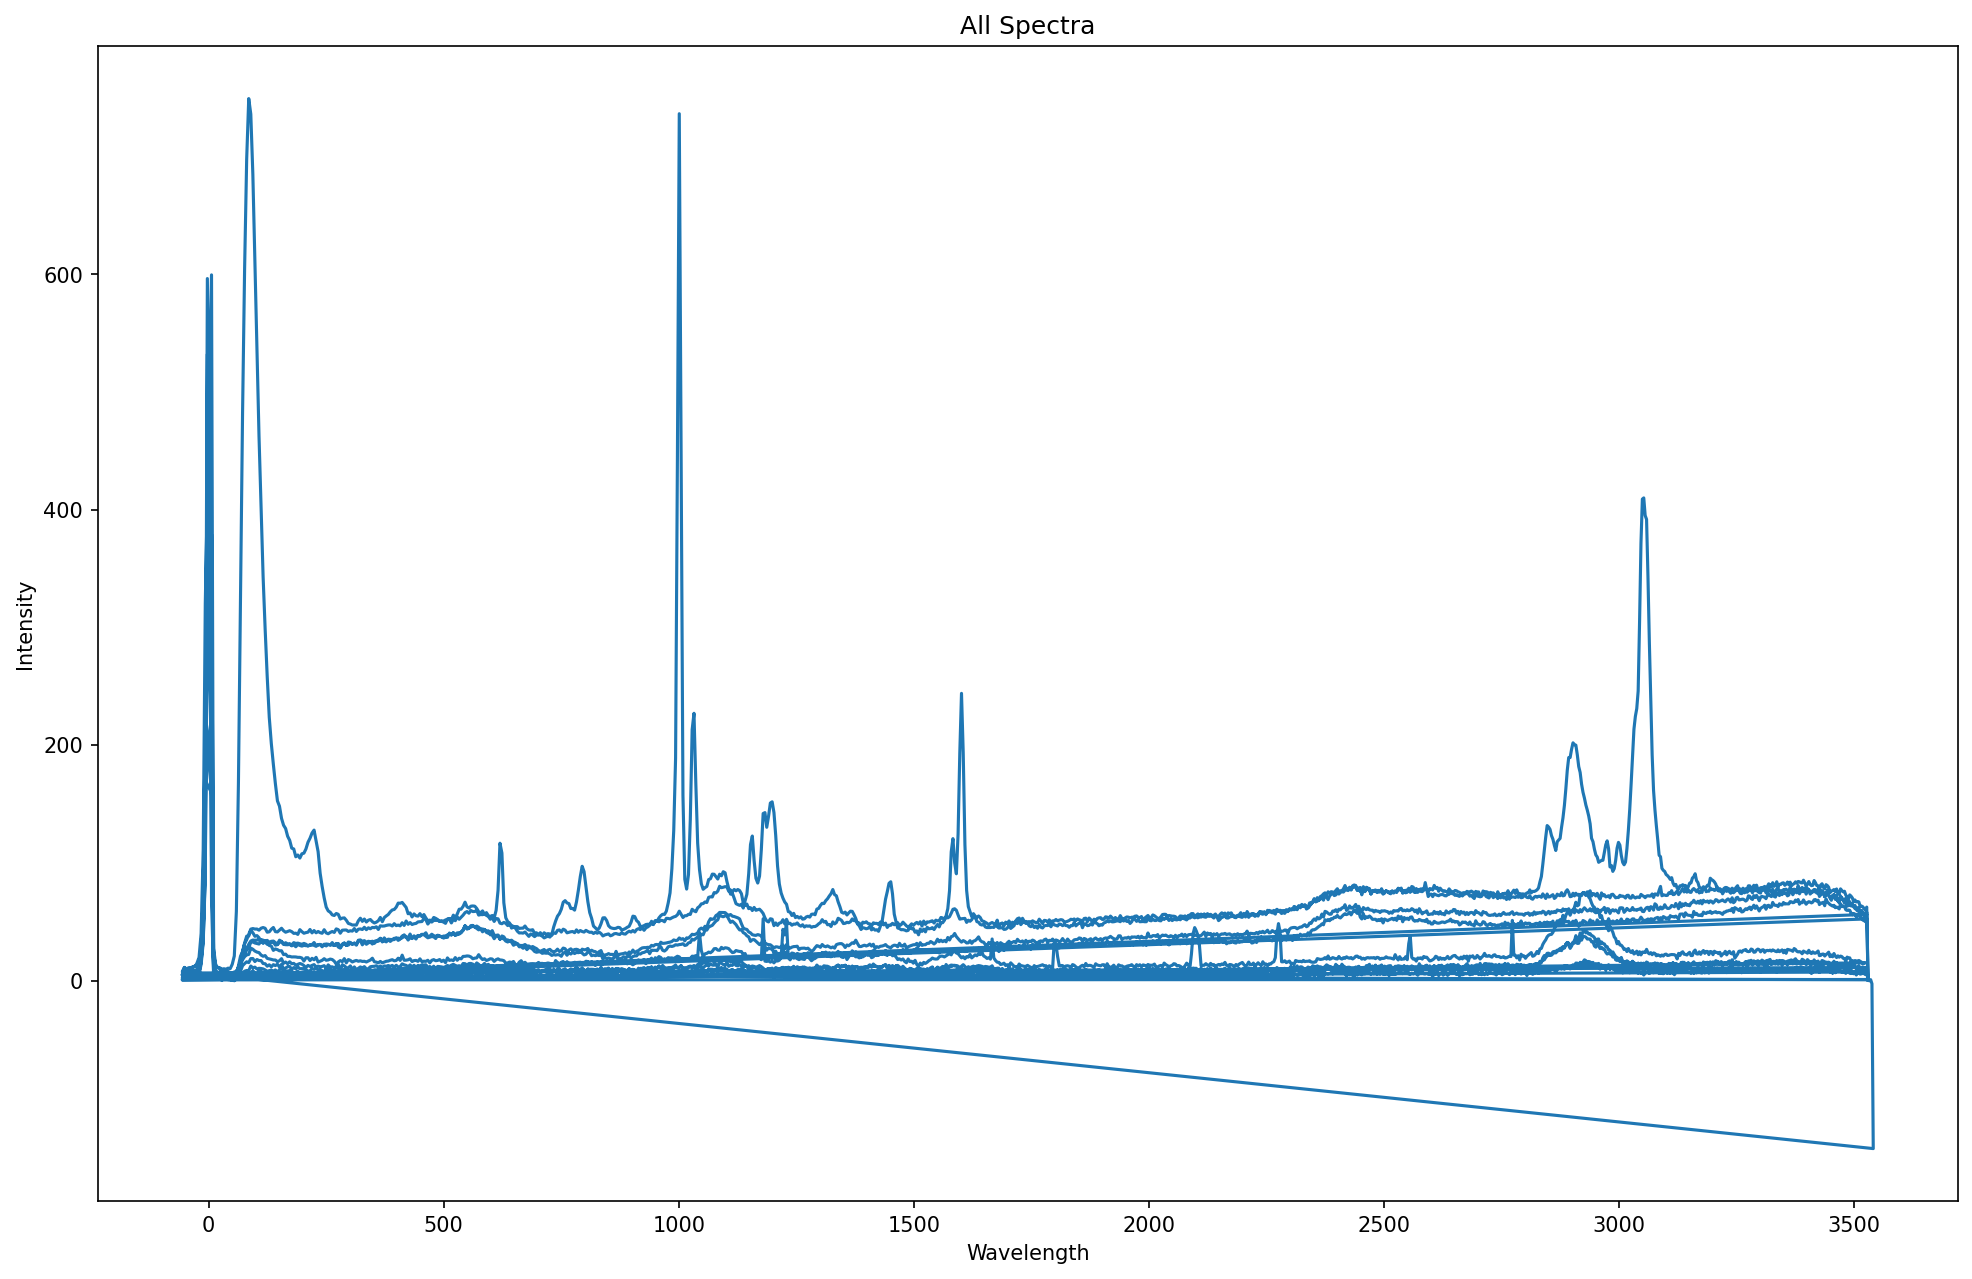

In [2]:
import csv
import matplotlib.pyplot as plt

# Load CTC database
def load_spectra(filepath):
    wavelengths = []
    intensities = []
    with open(filepath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skiping header row
        for row in reader:
            if len(row) >= 2:  # ensuring row has two columns (wavelength & intensity)
                try:
                    values = row[0].split('\t')  # split by tab character
                    wavelength = float(values[0].strip())  # Wavelength
                    intensity = float(values[1].strip())   # Intensity
                    wavelengths.append(wavelength)
                    intensities.append(intensity)
                except (ValueError, IndexError) as e:
                    print(f"Ignoring row: {row}. Error: {e}")
            else:
                print(f"Ignoring row: {row}. Insufficient columns.")
    return wavelengths, intensities

# Define pathways to CSV
spectra_filepath = "/kaggle/working/combined_data_with_separator.csv"

# Load spectra data
wavelengths, intensities = load_spectra(spectra_filepath)

# Define intensity threshold
intensity_threshold = 750

# Find indices of peaks above intensity threshold
indices_above_threshold = [i for i, intensity in enumerate(intensities) if intensity > intensity_threshold]

# Remove peaks above intensity threshold
filtered_wavelengths = [wavelength for i, wavelength in enumerate(wavelengths) if i not in indices_above_threshold]
filtered_intensities = [intensity for i, intensity in enumerate(intensities) if i not in indices_above_threshold]

# Plot all spectra
plt.figure(figsize=(16, 10), dpi=150)
plt.plot(filtered_wavelengths, filtered_intensities, linestyle='-', markersize=2)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('All Spectra')
plt.show()